# Estatística Descritiva

Este trabalho implementa os códigos apresentados no capítulo 3, *Descriptive Statistics*, do livro *Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications*.

Utilizamos o software [asdf](https://github.com/asdf-vm/asdf) para instalar a versão 2.7 do Python utilizada nesta implementação de acordo com a versão utilizada no livro *Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications*.

Este código encontra-se disponível em #TODO: colocar o link do repo aqui

Para seu desenvolvimento instalamos o jupyter através do comando `pip install jupyter` e inicializamos o jupyter através do comando `jupyter notebook` para obter a interface web e criar esse arquivo.

In [5]:
# No livro é comentado sobre o pacote python anaconda que já traz vários pacotes para data science. Neste trabalho
# instalamos apenas o python e por isso colocamos essas linhas para instalar as bibliotecas utilizadas no capítulo
# 3 do livro
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that dat

## Introdução

## Preparação dos Dados

### Este exemplo

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Lendo as informações da base de dados disponibilizada em https://archive.ics.uci.edu/ml/datasets/Adult
file = open ("adult.data", "r")
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0
    
data = []
for line in file:
    data1 = line.split(", ")
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1],
                     chr_int(data1[2]), data1[3],
                     chr_int(data1[4]), data1[5],
                     data1[6], data1[7], data1[8],
                     data1[9], chr_int(data1[10]),
                     chr_int(data1[11]),
                     chr_int(data1[12]),
                     data1[13], data1[14]
                    ])

In [73]:
# Imprimindo o primeiro elemento dos dados carregados (lista). [1:5] é equivalente a "de 1 até 5" (5 não incluso)
print data[1:2]

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [8]:
# Aqui transformamos os dados em um DataFrame, que é uma forma de representar dados tabulares. A implementação
# desta estrutura é dada pela biblioteca pandas e fornece diversas métodos úteis para lidar com estes dados.
df = pd.DataFrame(data)
df.columns = [
    "age", "type_employer", "fnlwgt", "education", "education_num", "martial", "occupation", "relationship",
    "race", "sex", "capital_gain", "capital_loss", "hr_per_week", "country", "income"
]

In [16]:
# O método shape retorna a quantidade de linhas e colunas presentes nos dados carregados.
df.shape

(32561, 15)

In [9]:
# Através do DataFrame é possível agrupar os dados por colunas específicas
counts = df.groupby("country").size()
print counts.head()

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [10]:
# Também é possível selecionar subconjuntos dos dados, abaixo é utilizado a sintaxe do DataFrame para selecionar
# apenas as linhas onde a coluna 'sex' é igual a 'Male'
ml = df[(df.sex == "Male")]

In [11]:
# Também podemos combinar várias condições para obter subconjuntos mais específicos, neste caso logo abaixo
# selecionamos homens com salários altos.
ml1 = df[(df.sex == "Male") & (df.income == ">50K\n")]
fm = df[(df.sex == "Female")]
fm1 = df[(df.sex == "Female") & (df.income == ">50K\n")]

## Análise de Dados Exploratória

### Sumarizando os Dados

In [12]:
# Explorando a frequência de dados categóricos
df1 = df[(df.income == ">50K\n")]
print "The rate of people with high income is:", int(len(df1) / float(len(df)) * 100), "%"
print "The rate of men with high income is:", int(len(ml1) / float(len(ml)) * 100), "%"
print "The rate of women with high income is:", int(len(fm1) / float(len(fm)) * 100), "%"

The rate of people with high income is: 24 %
The rate of men with high income is: 30 %
The rate of women with high income is: 10 %


#### Média

In [24]:
# Média de idade dos homens
print "The average age of men is:", ml["age"].mean()
# Média de idade dos homens com maiores salários
print "The average age of women is:", fm["age"].mean()

# Média de idade das mulheres
print "The average age of high-income men is:", ml1["age"].mean()
# Média de idade das mulheres com maiores salários
print "The average age of high-income women is:", fm1["age"].mean()

The average age of men is: 39.43354749885268
The average age of women is: 36.85823043357163
The average age of high-income men is: 44.62578805163614
The average age of high-income women is: 42.125530110262936


#### Variância da Amostra

In [13]:
# Média, variância e desvio padrão das idades de homens e mulheres
ml_mu = ml["age"].mean()
fm_mu = fm["age"].mean()
ml_var = ml["age"].var()
fm_var = fm["age"].var()
ml_std = ml["age"].std()
fm_std = fm["age"].std()
print "Statistics of age for men: mu:", ml_mu, "var:", ml_var, "std:", ml_std
print "Statistics of age for women: mu:", fm_mu, "var:", fm_var, "std:", fm_std

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174529985 std: 13.370630192526448
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948063 std: 14.013697099438332


#### Mediana da Amostra

In [14]:
# Mediana das idades de homens e mulheres
ml_median = ml["age"].median()
fm_median = fm["age"].median()
print "Median age per men and women:", ml_median, fm_median

# Mediana das idades de homens e mulheres com maiores salários (como é de se esperar, a mediana neste caso é
# maior)
ml_median_age = ml1["age"].median()
fm_median_age = fm1["age"].median()
print "Median age per men and women with high-income:", ml_median_age, fm_median_age

Median age per men and women: 38.0 35.0
Median age per men and women with high-income: 44.0 41.0


### Distribuições de Dados

/home/kadu/.asdf/installs/python/2.7.18/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


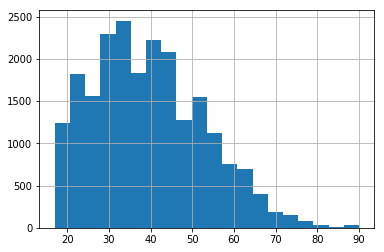

In [15]:
# Histograma das idades dos homens
ml_age = ml["age"]
ml_age.hist(normed = 0, histtype = "stepfilled", bins = 20)

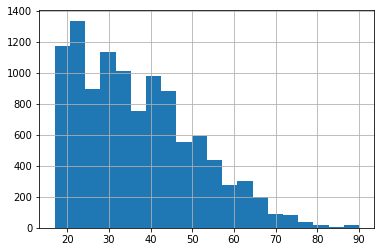

In [16]:
# Histograma das idades das mulheres
fm_age = fm["age"]
fm_age.hist(normed = 0, histtype = "stepfilled", bins = 20)

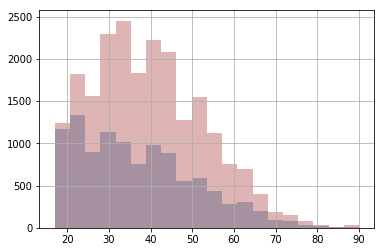

In [20]:
# Combinando os histogramas é possível ver facialmente a quantidade de pessoas sexo em cada classe de idade. Neste
# caso, podemos ver que existem muito mais homens que mulheres. No livro a quantidade de classes utilizada para
# homens e mulheres é diferente e me pareceu distorcer o comparativo dos dados, pois a quantidade de homens em
# cada classe acaba se tornando muito maior, pois cada classe abrange uma faixa maior de idades.
fm_age.hist(normed = 0, histtype = "stepfilled", alpha = .5, bins = 20)
ml_age.hist(normed = 0, histtype = "stepfilled", alpha = .5, bins = 20, color = sns.desaturate("indianred", .75))

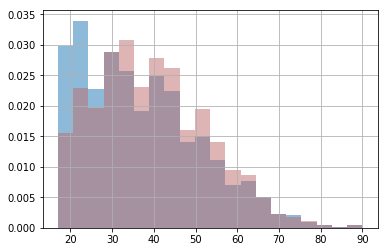

In [21]:
# Também é possível normalizar os dados de cada classe de acordo com o tamanho da amostra. Isso é feito dividindo
# as frequências de cada classe por n (tamanho da amostra). Este tipo de histograma é chamado de Função Massa de
# Probabilidade (FMP). Apesar de terem menos mulheres, verificamos neste gráfico que a probabilidade de mulheres
# é muito maior nas classes de [15-20) e [20-25).
fm_age.hist(normed = 1, histtype = "stepfilled", alpha = .5, bins = 20)
ml_age.hist(normed = 1, histtype = "stepfilled", alpha = .5, bins = 20, color = sns.desaturate("indianred", .75))

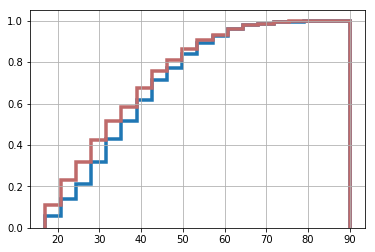

In [22]:
# Abaixo é plotado um histograma como uma Função Distribuição Acumulada (FDA). Através desta é possível
# identificar facilmente a porcentagem de valores abaixo de uma determinada classe. Neste caso vemos a FDA das
# idades de homens (azul) e mulheres (vermelho).
ml_age.hist(normed = 1, histtype = "step", cumulative = True, linewidth = 3.5, bins = 20)
fm_age.hist(normed = 1, histtype = "step", cumulative = True, linewidth = 3.5, bins = 20,
            color = sns.desaturate("indianred", .75))

### Tratamento de Outlier

In [31]:
# Aqui utilizamos alguns métodos do DataFrame para eliminar valores discrepantes, para este caso são considerados
# outliers valores maiores que 72 anos e menores que 22. Neste casos, corrigimos a condição do livro para utilizar
# o operador | (ou) e utilizar < (menor que) para eliminar idades menores que 22. Traduzindo a expressão, neste
# caso temos: retire do dataframe, todos as linhas onde a renda é ">50K\n" E a idade seja maior que 72 OU a idade
#             seja menor que 22.
df2 = df.drop(df.index[(df.income == ">50K\n") &
                       (df["age"] > df["age"].median() + 35) |
                       (df["age"] < df["age"].median() - 15)
                      ])
ml1_age = ml1["age"]
fm1_age = fm1["age"]

ml2_age = ml1_age.drop(ml1_age.index[
    (ml1_age > df["age"].median() + 35) |
    (ml1_age < df["age"].median() - 15)
])
fm2_age = fm1_age.drop(fm1_age.index[
    (fm1_age > df["age"].median() + 35) |
    (fm1_age < df["age"].median() - 15)
])

In [32]:
# Cálculos estatísticos da amostra sem os outliers.
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()

print "Men statistics:"
print "Mean:", mu2ml, "Std:", std2ml
print "Median:", md2ml
print "Min:", ml2_age.min(), "Max:", ml2_age.max()

print "Women statistics:"
print "Mean:", mu2fm, "Std:", std2fm
print "Median:", md2fm
print "Min:", fm2_age.min(), "Max:", fm2_age.max()

Men statistics:
Mean: 44.325352326110014 Std: 10.012302742491938
Median: 44.0
Min: 22 Max: 72
Women statistics:
Mean: 41.93236301369863 Std: 9.98952564884922
Median: 41.0
Min: 22 Max: 72


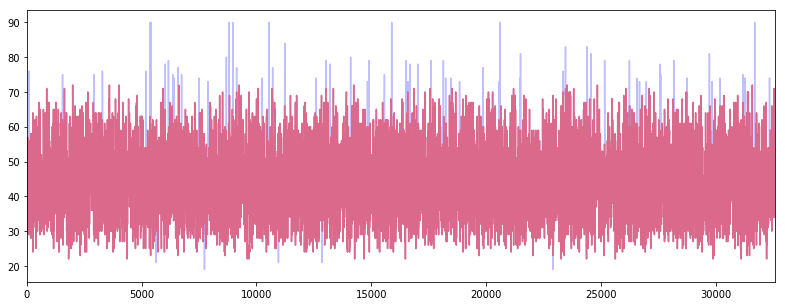

In [40]:
# No gráfico abaixo podemos ver visualmente a diferenças nos dados após a remoção dos outliers. Em azul estão as
# idades de todos os dados e em vermelho podemos ver que as idades maior que 72 e menor que 22 foram removidas.
plt.figure(figsize = (13.4, 5))
df.age[(df.income == ">50K\n")].plot(alpha = .25, color = "blue")
df2.age[(df.income == ">50K\n")].plot(alpha = .45, color = "red")

In [41]:
# Pelo último gráfico, percebemos que a maioria dos outliers estão acima de 72 anos, desta forma a média dos dados
# sem os outliers diminui:
print "The mean difference with outliers is: %4.2f." % (ml_age.mean() - fm_age.mean())
print "The mean difference without outliers is: %4.2f." %(ml2_age.mean() - fm2_age.mean())

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.39.


/home/kadu/.asdf/installs/python/2.7.18/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.
/home/kadu/.asdf/installs/python/2.7.18/lib/python2.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


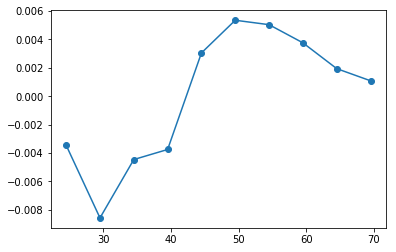

In [47]:
# A função 'histogram' da biblioteca numpy (np) consegue retornar as contagens em cada classe (countx e county) e
# também as classes que geradas (divisionx e divisiony). Como as idades estão entre 22 e 72 e as idades, neste
# caso, se distribuem de forma semelhante entre homens e mulheres as classes geradas acabaram sendo iguais.
countx, divisionx = np.histogram(ml2_age, normed = True)
county, divisiony = np.histogram(fm2_age, normed = True)

# Para plotagem foi utilizado o valor médio entre os valores de ínicio de cada classe e a diferença (normalizada)
# da quantidade de homens menos a quantidade de mulheres em cada classe. No gráfico, vemos que os números são
# negativos antes dos 42 anos, indicando que as mulheres tendem a ser promovidas antes que os homens.
val = [(divisionx[i] + divisionx[i+1]) / 2 for i in range(len(divisionx) - 1)]
plt.plot(val, countx - county, "o-")

### Medindo Assimetria: Skewness e Person's Median Skewness Coefficient

In [50]:
# Neste dados, a distribuição das mulheres é mais assimétrica do que as do homens (se distancia mais do 0). O
# autor sugere que isso se deva a uma maior probabilidade dos homens trabalharem até uma idade mais avançada.
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

print "Skewness of the male population =", skewness(ml2_age)
print "Skewness of the female population =", skewness(fm2_age)

Skewness of the male population = 0.26644438384328223
Skewness of the female population = 0.3863335249128606


In [51]:
# O coeficiente de person (neste caso o segundo coeficiente, pois usa a mediana) é considerado uma medida mais
# robusta para medir a assimetria e neste exacerba a diferença entre homens e mulheres.
def pearson(x):
    return 3 * (x.mean() - x.median()) * x.std()

print "Person's coefficient of the male population =", pearson(ml2_age)
print "Person's coefficient of the female population =", pearson(fm2_age)

Person's coefficient of the male population = 9.558304022209926
Person's coefficient of the female population = 26.406726907280902
